# Importing Stuff

In [1]:
!pip install -qq simpletransformers

     |████████████████████████████████| 225kB 16.6MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 317kB 20.5MB/s 
     |████████████████████████████████| 1.8MB 51.9MB/s 
     |████████████████████████████████| 7.4MB 53.9MB/s 
     |████████████████████████████████| 2.9MB 52.6MB/s 
     |████████████████████████████████| 1.3MB 50.3MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 133kB 55.7MB/s 
     |████████████████████████████████| 102kB 13.8MB/s 
     |████████████████████████████████| 163kB 57.4MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 6.9MB 51.6MB/s 
     |████████████████████████████████| 133kB 51.7MB/s 
     |████████████████████████████████| 4.5MB 48.3MB/s 
     |████████████████████████████████| 112kB 65.7MB/s 
     |████████████████████████████████| 1.1MB 50.7MB/s 
     |████████████████████████████████| 890kB 50.2MB

In [2]:
import pandas as pd
from simpletransformers.classification import ClassificationModel
import logging 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing the Data

In [4]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [5]:
# Reading the data:
train = pd.read_csv("/content/drive/My Drive/Glue Labs/Abuse Model 16/Data/train.csv")
test = pd.read_csv("/content/drive/My Drive/Glue Labs/Abuse Model 16/Data/test.csv")

In [6]:
train.drop(['Unnamed: 0'], axis=1, inplace = True)
test.drop(['Unnamed: 0'], axis=1, inplace = True)

# Model

In [ ]:
model = ClassificationModel('bert', 'bert-base-multilingual-cased', 
                            args={'reprocess_input_data': True,
                                  'overwrite_output_dir': True,
                                  'train_batch_size': 64,
                                  'num_train_epochs': 5, 
                                  'save_model_every_epoch':False},
                             use_cuda=True)

INFO:filelock:Lock 140056595689424 acquired on /root/.cache/torch/transformers/0a3fd51713dcbb4def175c7f85bddc995d5976ce1dde327f99104e4d33069f17.aa7be4c79d76f4066d9b354496ea477c9ee39c5d889156dd1efb680643c2b052.lock


INFO:filelock:Lock 140056595689424 released on /root/.cache/torch/transformers/0a3fd51713dcbb4def175c7f85bddc995d5976ce1dde327f99104e4d33069f17.aa7be4c79d76f4066d9b354496ea477c9ee39c5d889156dd1efb680643c2b052.lock


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

INFO:filelock:Lock 140056594827304 released on /root/.cache/torch/transformers/eff018e45de5364a8368df1f2df3461d506e2a111e9dd50af1fae061cd460ead.6c5b6600e968f4b5e08c86d8891ea99e51537fc2bf251435fb46922e8f7a7b29.lock


In [ ]:
# First set:
model.train_model(train, output_dir="/content/drive/MyDrive/Glue Labs/Abuse Model 16/Model/b (M-BERT)")

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to /content/drive/MyDrive/Glue Labs/Abuse Model 16/Model/b (M-BERT).


(7815, 0.09810786527333935)

# Evaluating

In [11]:
model = ClassificationModel('bert', '/content/drive/MyDrive/Glue Labs/Abuse Model 16/Model/b (M-BERT)/outputs')

In [12]:
result, model_outputs, wrong_predictions = model.eval_model(test)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_model:{'mcc': 0.8948655720217027, 'tp': 7193, 'tn': 8144, 'fp': 332, 'fn': 518, 'eval_loss': 0.13941015829528883}


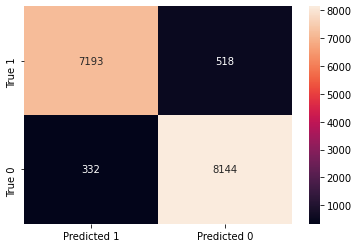

In [14]:
import seaborn as sns
matrix = [[result['tp'], result['fn']], [result['fp'], result['tn']]]
matrix = pd.DataFrame(matrix, columns = ['Predicted 1', 'Predicted 0'], index = ['True 1', 'True 0'])

sns.heatmap(matrix, annot=True, fmt = 'g')

In [ ]:
test1 = pd.read_csv("/content/drive/MyDrive/Glue Labs/Abuse Model 16/Data/test1(hinglsih).csv")
test1

,text,labels
0,bc,1
1,kutte ki bachi,1
2,kuch kaam dhaam hai ya bas yahi karna hai,0
3,acha but what do you think about java,1
4,kat duga tuhe jihadi,1
5,"khatir daari karwalo bas aapse, madam raat ka ...",1
6,tu ja na rotiya paka mujhe mat bata python mai...,1
7,randi,1
8,what the fuck is this you suck at it,1
9,fuck you gaand mara,1


In [ ]:
import time
start_time = time.time()
result, model_outputs, wrong_predictions = model.eval_model(test1)
print("--- %s seconds ---" % (time.time() - start_time))


INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_model:{'mcc': 0.29012942659282975, 'tp': 4, 'tn': 8, 'fp': 1, 'fn': 7, 'eval_loss': 1.9454061190287273}



--- 0.6050007343292236 seconds ---


In [ ]:
!cp -r "/content/outputs" "/content/drive/MyDrive/Glue Labs/Abuse Model 16/Model/b (M-BERT)"